# 5G Energy Consumption Modeling

This project aims to build a machine learning model to estimate the energy consumption of 5G base stations (BSs) using a dataset provided by the **International Telecommunication Union (ITU)** as part of the **Global 5G Energy Consumption Challenge 2023**.
### Problem Statement
Telecom operators face high energy costs, with 70% consumed by radio access networks (RAN). The goal is to predict energy consumption based on traffic statistics, engineering configurations, and energy-saving methods.
### Dataset
- **Source**: ITU Challenge 2023  
- **Features**: Traffic stats, configurations, energy-saving methods  
- **Target**: Energy consumption (kWh)  
### Tools and Libraries
- **Python**: NumPy, Pandas, Scikit-learn  
### Approach
1. **Preprocessing**: Clean and scale data.  
2. **EDA**: Explore patterns and correlations.  
3. **Modeling**: Train and evaluate ML model to optimize predictions using stacked models comprising XGBRegressor, DecisionTreeRegressor, RandomForestRegressor.
### Objective
Develop predictive models to forecast energy usage in different scenarios.

In [1]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Loading dataset with pandas
df = pd.read_csv(r"C:\Users\Pearl\Downloads\5G_energy_consumption_dataset.csv")
df.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


In [3]:
## summary statitics of dataset
df.describe()

,Energy,load,ESMODE,TXpower
count,92629.000000,92629.000000,92629.000000,92629.000000
mean,28.138997,0.244705,0.081361,6.765427
std,13.934645,0.234677,0.382317,0.309929
min,0.747384,0.000000,0.000000,5.381166
25%,18.236173,0.057370,0.000000,6.427504
50%,24.065770,0.165550,0.000000,6.875934
75%,35.724963,0.363766,0.000000,6.875934
max,100.000000,0.993957,4.000000,8.375336


In [4]:
df.columns

Index(['Time', 'BS', 'Energy', 'load', 'ESMODE', 'TXpower'], dtype='object')

In [5]:
df.shape

(92629, 6)

In [6]:
## verifying presence of null values
df.isnull().any()

Time       False
BS         False
Energy     False
load       False
ESMODE     False
TXpower    False
dtype: bool

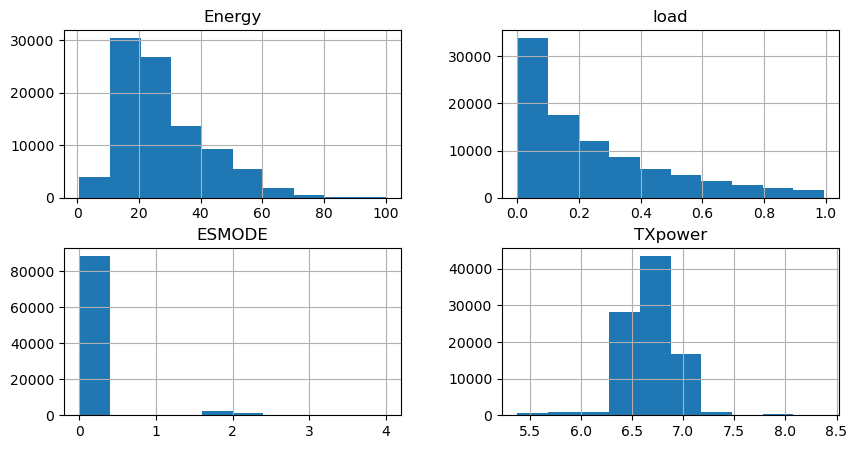

In [7]:
## checking for outliers
df.hist(figsize = (10,5));

In [8]:
## Normalising data using StandardScaler
scaler = StandardScaler()

In [9]:
df2 = df[['Energy', 'load', 'ESMODE', 'TXpower']]
scaled_array = scaler.fit_transform(df2)

In [10]:
scaled_data = pd.DataFrame(scaled_array, columns = ['Energy', 'load', 'ESMODE', 'TXpower'])


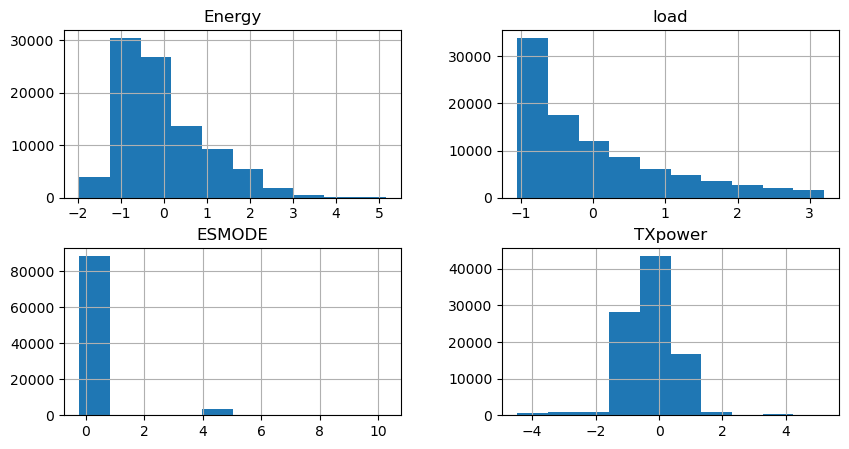

In [11]:
scaled_data.hist(figsize = (10,5));

In [12]:
scaled_data.head()

,Energy,load,ESMODE,TXpower
0,2.593266,1.036457,-0.212811,1.085068
1,1.992551,0.425112,-0.212811,1.085068
2,2.121275,-0.217059,-0.212811,1.085068
3,1.938916,-0.095117,-0.212811,1.085068
4,2.003278,-0.295166,-0.212811,1.085068


Text(0.5, 1.0, 'relationship between cell load and energy consumption')

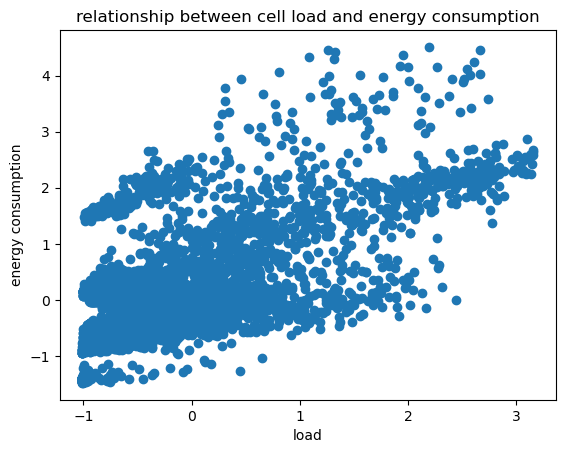

In [13]:
scaled_data_sample = scaled_data.iloc[:4000, :]
plt.xlabel("load")
plt.ylabel("energy consumption")
plt.scatter(scaled_data_sample.load,scaled_data_sample.Energy)
plt.title("relationship between cell load and energy consumption")

Text(0.5, 1.0, 'relationship between intensity of energy saving modes  and level of energy consumption')

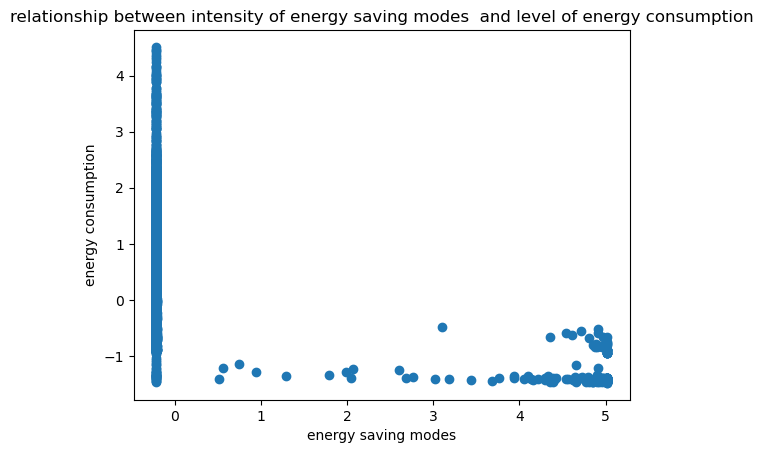

In [14]:
plt.xlabel("energy saving modes")
plt.ylabel("energy consumption")
plt.scatter(scaled_data_sample.ESMODE,scaled_data_sample.Energy)
plt.title("relationship between intensity of energy saving modes  and level of energy consumption")

Text(0.5, 1.0, 'relationship between Maximum transmit power of the cell and level of energy consumption')

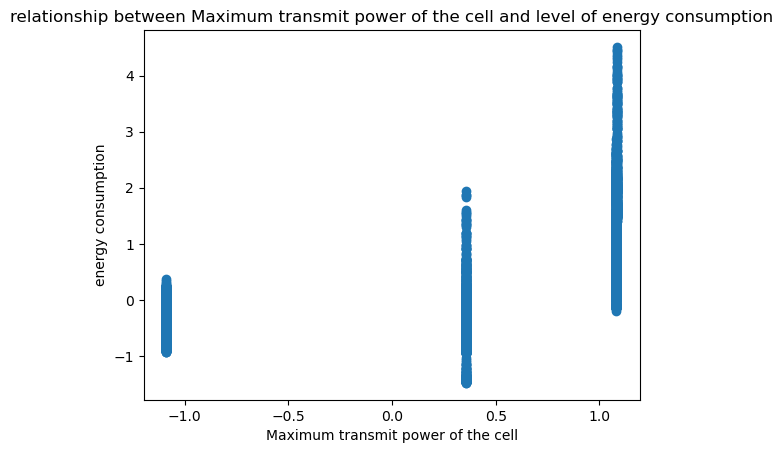

In [15]:
plt.xlabel("Maximum transmit power of the cell")
plt.ylabel("energy consumption")
plt.scatter(scaled_data_sample.TXpower,scaled_data_sample.Energy)
plt.title("relationship between Maximum transmit power of the cell and level of energy consumption")

In [16]:
def draw_regplot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        #dataframe[feature].hist(bins =20,ax=ax,facecolor='midnightblue')
        sns.regplot(data=dataframe, x =dataframe[feature], y= "Energy")
        ax.set_title(feature+" Regression plot",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
#draw_regplot(data,data.columns,6,3)

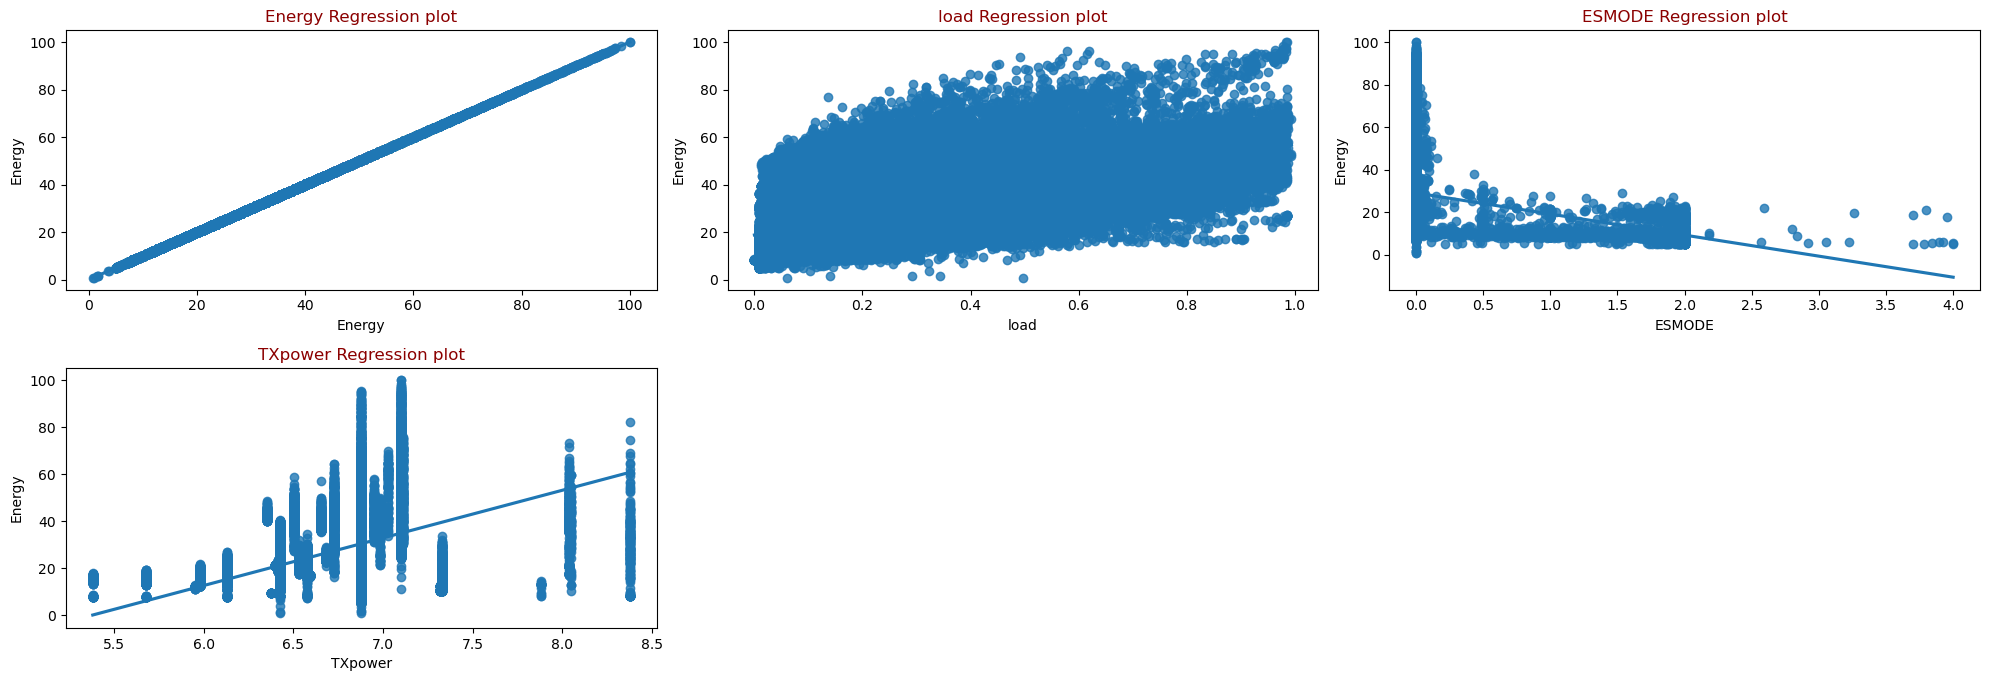

In [17]:
num_col = df.select_dtypes("number")
draw_regplot(num_col, num_col.columns, 6,3)

In [18]:
## checking correlation between target and independent variables
df.select_dtypes("number").corr()["Energy"].sort_values(ascending=False)

Energy     1.000000
load       0.643022
TXpower    0.450760
ESMODE    -0.271783
Name: Energy, dtype: float64

In [19]:
# defining our target and predictor variables
x = df.drop(["Energy","Time","BS"], axis=1).values
y = df.Energy.values

In [20]:
##  splitting training and testing data to the ratio of 85%:15% respectively
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.15, random_state= 42)

In [21]:
models = {
    "linear_regression": LinearRegression(n_jobs= 10),
    "XGBRegressor":XGBRegressor(),
    "DecisionTree":DecisionTreeRegressor(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "RandomForestRegressor":RandomForestRegressor(n_estimators=100, max_depth=5, random_state=1)
    
}

In [22]:
for name, model in models.items():
    print(model.fit(x_train, y_train))
    print(model.score(x_train, y_train))
    print(model.score(x_test,y_test))

LinearRegression(n_jobs=10)
0.5536468085675847
0.5474014514945014
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
0.8725545379531621
0.861247226894617
DecisionTreeRegressor()
0.9865463194384751
0.7437928662789529
Lasso()
0.40946070059414563
0.40612800606188515
Ridge()
0.5536467927884459
0.54740416640

From the above analysis, DecisionTreeRegressor performs so well on training dataset but performs bad on testing data. This is caused by overfitting. Cross validating the dataset aids to reduce overfitting

In [23]:
## cross validating dataset
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeRegressor(), x_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {scores.mean()}")

Cross-Validation R2 Scores: 0.7502558161580974


After cross validating, we can see that there's no improvement in the score. I'd stack multiple models (e.g., Decision Trees, Gradient Boosting, Random Forests) and let a meta-model decide the final output.

In [37]:
from sklearn.ensemble import StackingRegressor
stacked_model = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(n_estimators=100)),
        ('xgb', XGBRegressor()),
        ('dt', DecisionTreeRegressor())
    ]
)
stacked_model.fit(x_train, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('dt', DecisionTreeRegressor())])

In [38]:
stacked_model.score(x_test,y_test)

0.8612501469849061

In [39]:
y_pred = model.predict(x_test)

In [40]:
y_pred[:10]

array([47.58633483, 10.57455599, 21.35469347, 54.19109367, 16.57317969,
       30.86450324, 47.58633483, 16.55410808, 16.55410808, 52.39851932])

In [41]:
y_test[:10]

array([44.84304933, 20.47832586, 13.75186846, 57.99701046, 37.9671151 ,
       36.17339312, 56.05381166,  8.22122571, 12.10762332, 59.19282511])

In [42]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2_score:", r2_score(y_test, y_pred))

MAE: 4.343299233216343
MSE: 35.70139510440246
R2_score: 0.8124642463250924
